<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Tablas_de_verdad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recreación de las puertas lógicas del paper:

[_Nonlinear delay differential equations and their application to modeling biological network motifs_](https://www.nature.com/articles/s41467-021-21700-8#Fig5)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Se declara la función activadora/supresora del sistema de la siguiente manera:

$$act(e, n, s) = \frac{e}{1 + s^n}$$

In [55]:
def act(e, n, s):
    return e/(1 + s**n)

In [56]:
def dS(X, Y, S, i, n, e):
    R, Z = S[i]
    dR = act(e[0], n[0], X[i]) + act(e[1], n[1], Y[i]) - R
    dZ = act(1, n[2], R) - Z

    return np.array([dR, dZ])

In [81]:
def RK_solver(X, Y, S0, t, n, e):
    dims = len(S0)
    K = np.empty([4, dims])
    S = np.empty([len(t)+1, dims])
    
    for d in range(dims):   
        S[0, d] = S0[d]

    dt = t[1] - t[0]; 
    for i in range(len(t)):
        K[0] = dt * dS(X, Y, S, i, n, e) 
        K[1] = dt * dS(X, Y, S + K[0]/2, i, n, e)
        K[2] = dt * dS(X, Y, S + K[1]/2, i, n, e)
        K[3] = dt * dS(X, Y, S + K[2]  , i, n, e)
        for d in range(dims):
            S[i+1, d] = S[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    S = S[0:-1,:]
    return S

In [73]:
def plot_gate(X, Y, S0, t, n, e, title="OR"):
    labels = ["$R$", "$Z$"]

    Pip = RK_solver(S0, t, n, e)
    plt.figure(figsize=(12,2))
    plt.plot(X, "--", label="$X$")
    plt.plot(Y, "--", label="$Y$")
    plt.title(f"Puerta lógica ${title}$")
    plt.legend(); plt.show()

    plt.figure(figsize=(12,2))
    for i in range(len(Pip[0])):
        plt.plot(Pip[:,i], label=labels[i])
    plt.legend(); plt.show()

In [74]:
start=0; step=0.1; num=800
t = np.arange(0,num)*step+start

S0 = np.array([0.1, 0.1])   

In [75]:
X = np.concatenate([np.zeros(num//2), np.ones(num//2)]) 
Y = np.concatenate([np.zeros(num//4), np.ones(num//4), np.zeros(num//4), np.ones(num//4)]) 

# Puerta lógica: ___OR___ 

C:\Users\joshx\AppData\Local\Temp\ipykernel_53368\1244920665.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


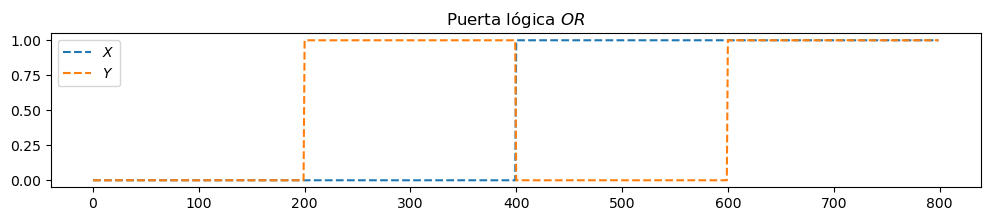

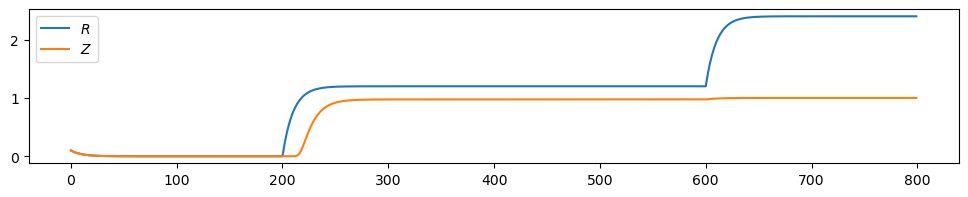

In [76]:
n = [-4, -4, -20]
e = [2.4, 2.4]

plot_gate(X, Y, S0, t, n, e, title="OR")

# Puerta lógica: ___AND___

C:\Users\joshx\AppData\Local\Temp\ipykernel_53368\1244920665.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


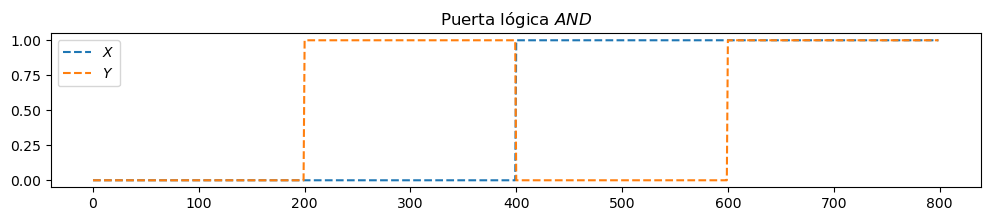

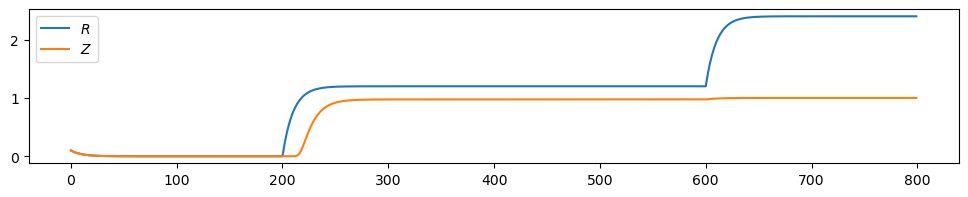

In [77]:
n = [-4, -4, -20]
e = [2.4, 2.4]

plot_gate(X, Y, S0, t, n, e, title="AND")

# Puerta lógica: ___X IMPLY Y___

C:\Users\joshx\AppData\Local\Temp\ipykernel_53368\1244920665.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


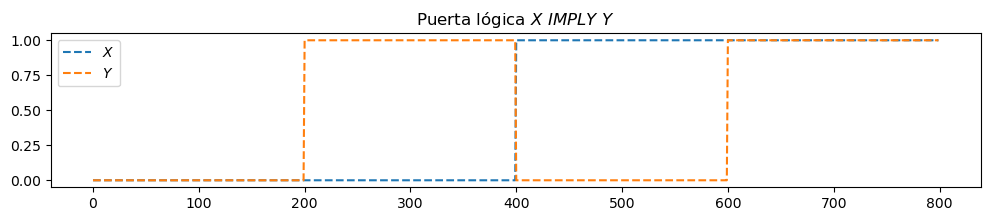

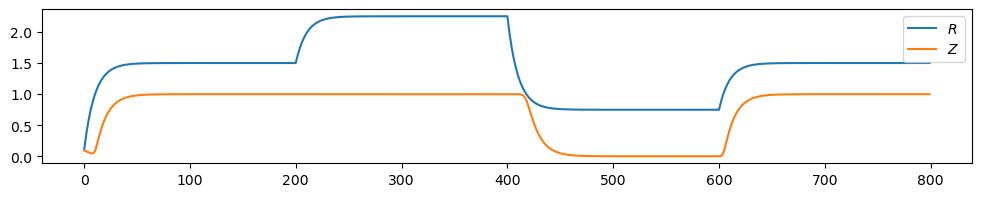

In [78]:
n = [2, -2, -20]
e = [1.5, 1.5]

plot_gate(X, Y, S0, t, n, e, title="X\ IMPLY\ Y")

# Puerta lógica: ___X NIMPLY Y___

C:\Users\joshx\AppData\Local\Temp\ipykernel_53368\1244920665.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


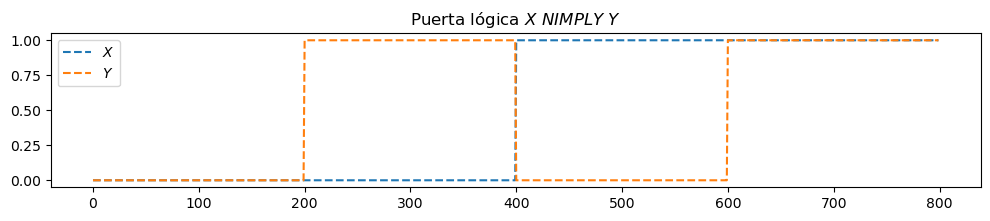

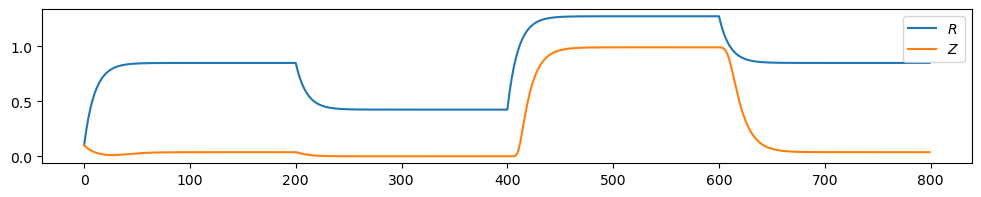

In [79]:
n = [-4, +4, -20]
e = [0.85, 0.85]

plot_gate(X, Y, S0, t, n, e, title="X\ NIMPLY\ Y")

# Puerta lógica de 3 entradas: ___OR___

Para esta parte se realiza la generalización de los casos más simples $n_1, n_2 <0$ es decir, las puertas lógicas $OR$ y $AND$.

In [97]:
X = np.concatenate([np.zeros(num//2), np.ones(num//2)]) 
Y = np.concatenate([np.zeros(num//4), np.ones(num//4), np.zeros(num//4), np.ones(num//4)]) 
ZZ = np.concatenate([np.zeros(num//8), np.ones(num//8), np.zeros(num//8), np.ones(num//8),
                     np.zeros(num//8), np.ones(num//8), np.zeros(num//8), np.ones(num//8)]) 

In [106]:
def dS_3(X, Y, ZZ, S, i, n, e):
    R, Z = S
    dR = e * (act(1, n[0], X[i]) + act(1, n[1], Y[i]) + act(1, n[2], ZZ[i])) - R
    dZ = act(1, n[3], R) - Z
    return np.array([dR, dZ])

def RK_solver_3(X, Y, Z, S0, t, n, e):
    dims = len(S0)
    K = np.empty([4, dims])
    S = np.empty([len(t)+1, dims])
    
    for d in range(dims):   
        S[0, d] = S0[d]

    dt = t[1] - t[0]; 
    for i in range(len(t)):
        K[0] = dt * dS_3(X, Y, Z, S[i], i, n, e) 
        K[1] = dt * dS_3(X, Y, Z, S[i] + K[0]/2, i, n, e)
        K[2] = dt * dS_3(X, Y, Z, S[i] + K[1]/2, i, n, e)
        K[3] = dt * dS_3(X, Y, Z, S[i] + K[2]  , i, n, e)
        for d in range(dims):
            S[i+1, d] = S[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    S = S[0:-1,:]
    return S

def plot_gate_3(X, Y, Z, S0, t, n, e, title="OR"):
    labels = ["$R$", "$Z$"]

    Pip = RK_solver_3(X, Y, Z, S0, t, n, e)
    plt.figure(figsize=(12,2))
    plt.plot(X, "--", label="$X$")
    plt.plot(Y, "--", label="$Y$")
    plt.plot(Z, "--", label="$Z$")
    plt.title(f"Puerta lógica múltiple: ${title}$")
    plt.legend(); plt.show()

    plt.figure(figsize=(12,2))
    for i in range(len(Pip[0])):
        plt.plot(Pip[:,i], label=labels[i])
    plt.legend(); plt.show()

C:\Users\joshx\AppData\Local\Temp\ipykernel_53368\1244920665.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


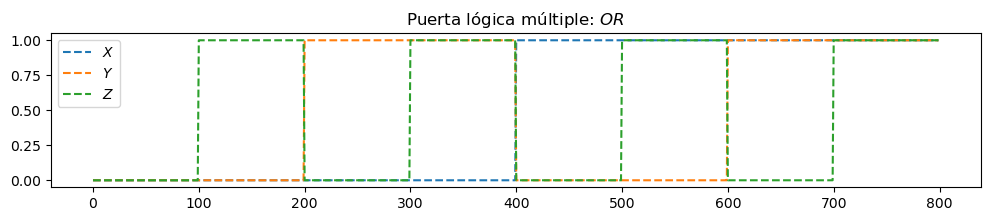

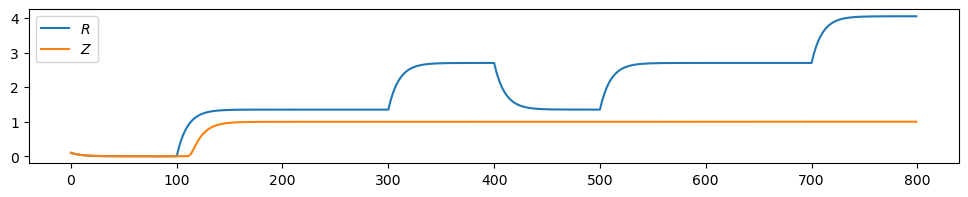

In [107]:
n = [-4, -4, -4, -20]
e = 2.7

plot_gate_3(X, Y, ZZ, S0, t, n, e, title="OR")

# Puerta lógica de 3 entradas: ___AND___

C:\Users\joshx\AppData\Local\Temp\ipykernel_53368\1244920665.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


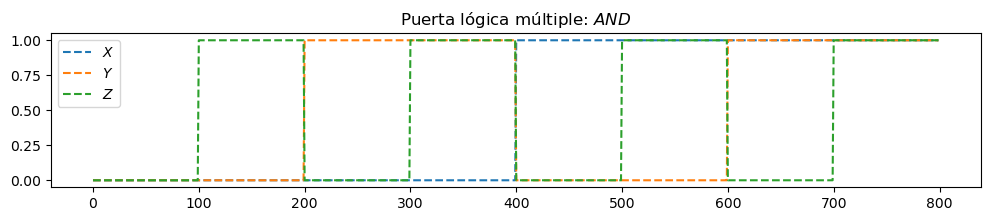

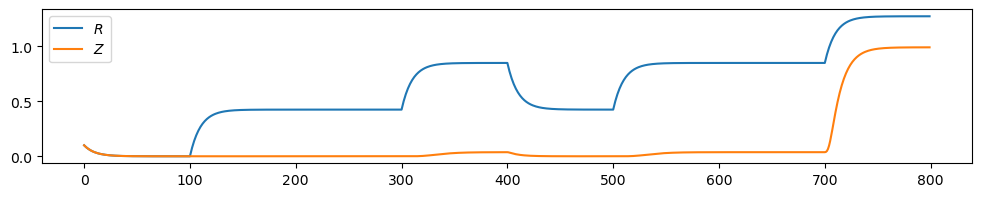

In [108]:
n = [-4, -4, -4, -20]
e = 0.85

plot_gate_3(X, Y, ZZ, S0, t, n, e, title="AND")

# Puerta lógica múltiple: ___X AND (NOT Y) AND (NOT Z)___

In [109]:
def dS(S, i):
    R, Z = S
    dR = e_1*(supr(1, n_1, 2*X[i]) + supr(1, n_2, 2*Y[i]) + supr(1, n_3, 2*ZZ[i])) - R
    # dR = supr(e_1, n_1, X[i]) + supr(e_1, n_1, Y[i]) + supr(e_1, n_1, ZZ[i]) - R
    # dZ = supr(3 * e_1, n_4, R) - Z
    dZ = supr(1, n_4, R) - Z

    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_53368\1244920665.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


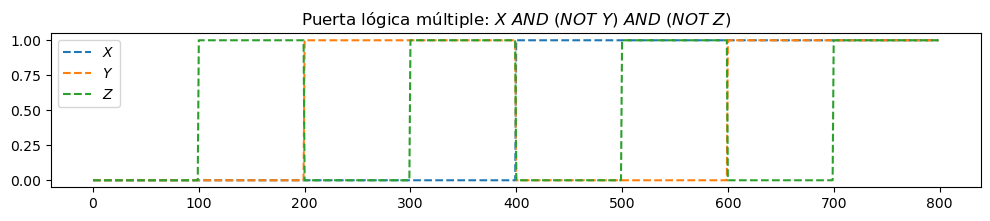

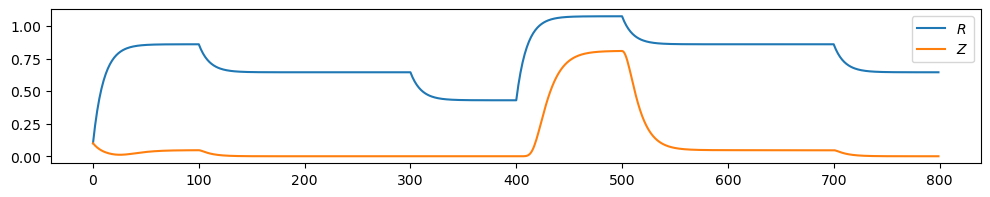

In [110]:
n = [-4, +4, +4, -20]
e = 0.43

plot_gate_3(X, Y, ZZ, S0, t, n, e, title="X\ AND\ (NOT\ Y)\ AND\ (NOT\ Z)")